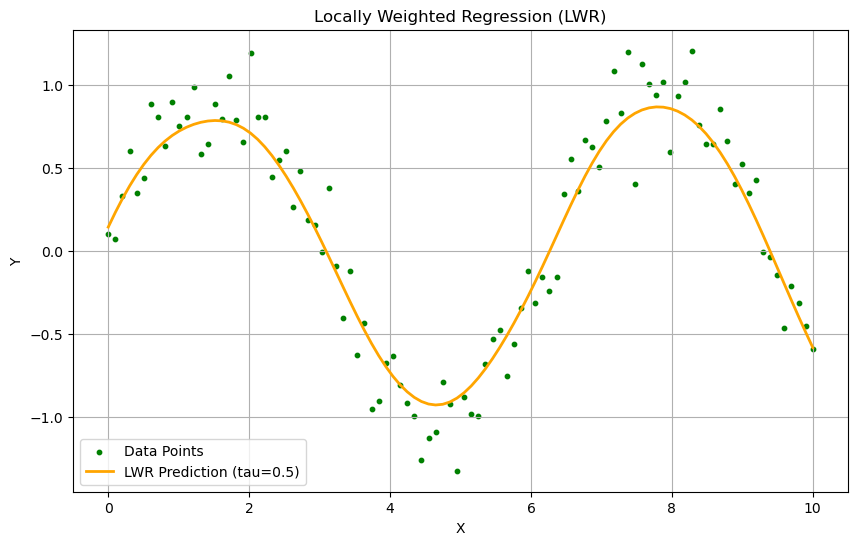

In [9]:
#Locally weighted Regression
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x=np.linspace(0,10,100)
y=np.sin(x)+np.random.normal(scale=0.2,size=x.shape)
x=x[:,np.newaxis]
def locally_weighted_regression(x_train,y_train,query_point,tau):
    weights=np.exp(-np.sum((x_train - query_point)**2,axis=1)/(2*tau**2))
    W=np.diag(weights)
    x_bias=np.hstack([np.ones_like(x_train),x_train])
    theta=np.linalg.inv(x_bias.T @ W @ x_bias) @ x_bias.T @ W @ y_train
    query_point_bias=np.array([1,query_point])
    prediction=query_point_bias @ theta
    return prediction
def predict_lwr(x_train,y_train,x_test,tau):
    predictions=np.array([locally_weighted_regression(x_train,y_train,x[0],tau) for x in x_test])
    return predictions
tau=0.5
y_pred=predict_lwr(x,y,x,tau)
plt.figure(figsize=(10,6))
plt.scatter(x,y,label="Data Points",color="green",s=10)
plt.plot(x,y_pred,label=f"LWR Prediction (tau={tau})",color="orange",linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Locally Weighted Regression (LWR)")
plt.legend()
plt.grid(True)
plt.show()